<a href="https://colab.research.google.com/github/septianidn/APM_11/blob/main/Pertemuan%202/Decision_Tree_(Algoritma_C4_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn  as sns
import pydotplus
from IPython.display import Image
import io

data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']), header=0)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose', 'DiabetesPedigreeFunction']
x = data[feature_cols] # Features
y = data['Outcome'] # Target variable
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [5]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Hasil Akurasi:",metrics.accuracy_score(y_test,y_pred))

Hasil Akurasi: 0.7207792207792207


In [6]:
hasil = tree.DecisionTreeClassifier(criterion='entropy')
hasil_train = hasil.fit(data,data['Outcome'])

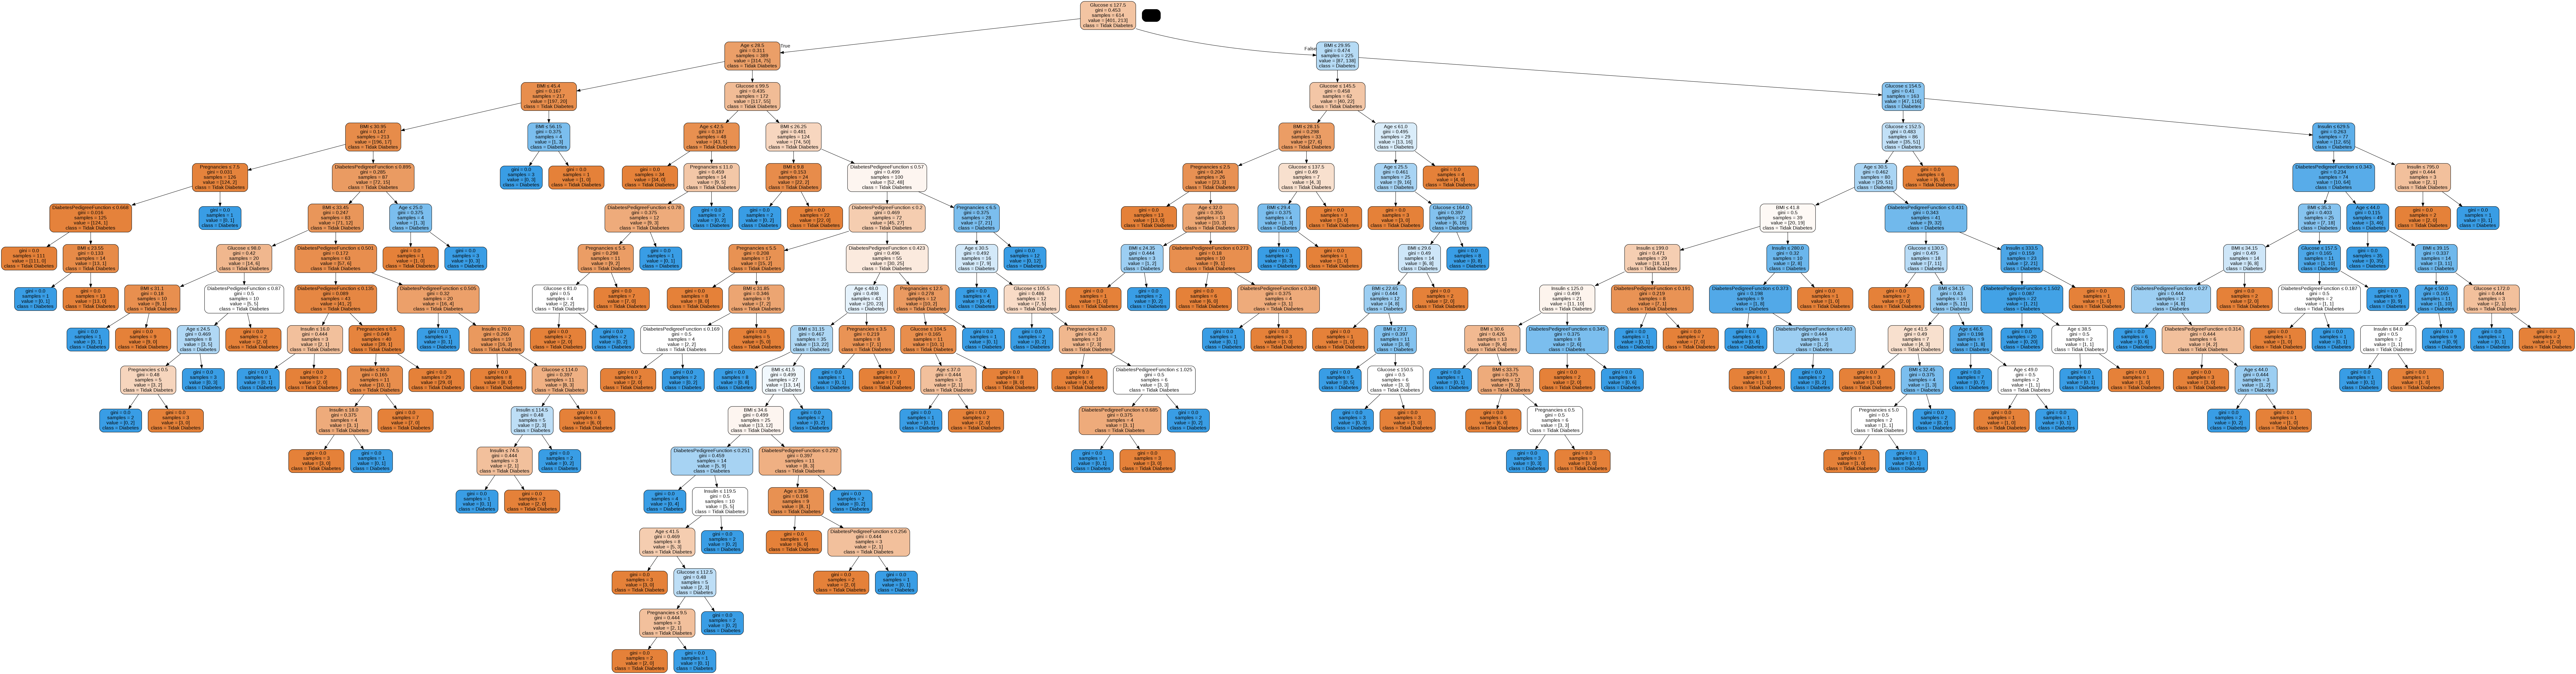

In [7]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Tidak Diabetes','Diabetes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[78 21]
 [22 33]]


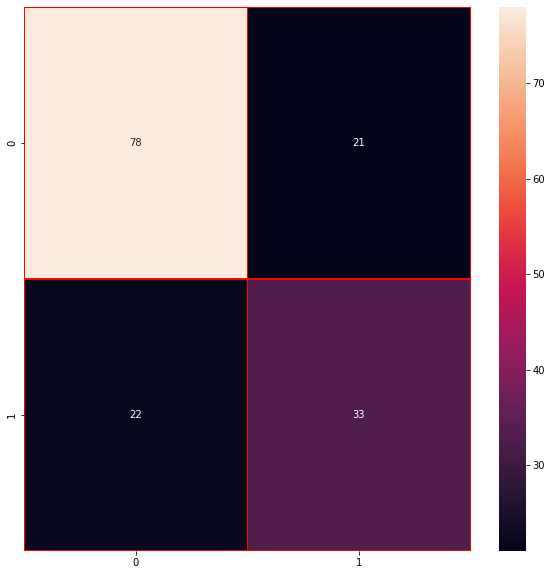

<Figure size 432x288 with 0 Axes>

In [9]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [10]:
print(classification_report(y_test, y_pred))
f1_score = f1_score(y_test, y_pred)
print("F1 Score:",f1_score)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.61      0.60      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

F1 Score: 0.6055045871559633
